# Generate Data Points

In [31]:
# Generat 10 (x,y) that are linear correlated
from sklearn.datasets import make_regression
import numpy as np
n=5
x,y,coef=make_regression(n_samples=n,
                         n_features=1,
                         n_informative=1,
                         random_state=0,
                         noise=20.0,
                         coef=True)

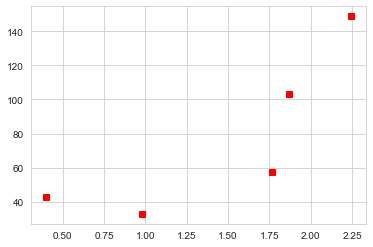

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.scatter(x, y, c='r', marker='s')

In [33]:
# Formulte 10 (x,y) obersevations into a matrix
import numpy as np
xy_matrix=np.column_stack((x, y))

In [200]:
print(xy_matrix)

[[  0.97873798  32.71079171]
 [  2.2408932  148.96263615]
 [  1.76405235  57.64711706]
 [  1.86755799 103.33818754]
 [  0.40015721  42.83273828]]


# Standardize the Data

In [35]:
# Let's standardize the data
from sklearn import preprocessing
standard_scaler=preprocessing.StandardScaler()
scaled = standard_scaler.fit_transform(xy_matrix)

In [201]:
print(scaled)

[[-0.70722819 -1.02504486]
 [ 1.18577858  1.65957016]
 [ 0.4706027  -0.4491879 ]
 [ 0.62584263  0.60596038]
 [-1.57499573 -0.79129778]]


In [37]:
x_scaled=[row[0] for row in scaled]
y_scaled=[row[1] for row in scaled]

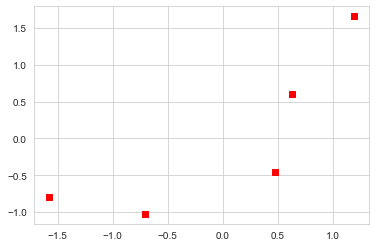

In [38]:
# Plot scaled points
plt.scatter(x_scaled, y_scaled, c='r', marker='s')

# Get SVD

In [39]:
# Use svd (Single Value Decomposition) function to calculate U,s,V
U,s,V=np.linalg.svd(scaled)

In [40]:
print(U)
print(s)
print(V)

[[-0.40589586  0.23780797  0.3030969   0.28014476 -0.77996609]
 [ 0.66670509 -0.35451701  0.58885854 -0.11087209 -0.26603572]
 [ 0.00501779  0.68823809  0.58977478 -0.04580537  0.41996515]
 [ 0.28862871  0.014877   -0.06546159  0.94042907  0.16667358]
 [-0.55445574 -0.58640606  0.45744768  0.15073593  0.34165344]]
[3.01777414 0.94500752]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


# Explore V

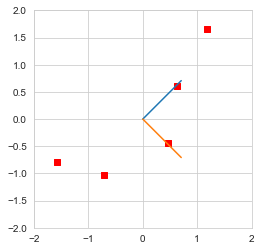

In [50]:
# V is a d*d matrix that indicates the rotation vector maximize the variance
# This rotations would remove multilinearity because if one feature is highly correlated with another, the first component would doninate the variance
plt.scatter(x_scaled, y_scaled, c='r', marker='s')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0,V[0][0]], [0,V[0][1]])
plt.plot([0,V[1][0]], [0,V[1][1]])
plt.show()

# Explore s

In [196]:
# s is the square root of the sum of squared projection lengths of all points
# The sum of projection lrnhyhd onto a specific axis represent how close all the points are to that axis
# It also represents how much the projection that keep the overall variance
# Therefore, with the first component, the variance kept is:
str(round(s[0]/(s[0]+s[1])*100,2))+'%'

'76.15%'

# Explore U

In [168]:
# U is the eigenvectors of A*A Transpose
import scipy.linalg as la
AAT=scaled.dot(scaled.T)
results=la.eig(AAT)
print(results[1])

[[ 0.40589586+0.j         -0.88243749+0.j          0.23780797+0.j
   0.19502433+0.16716061j  0.19502433-0.16716061j]
 [-0.66670509+0.j         -0.40220391+0.j         -0.35451701+0.j
  -0.19834005-0.22188024j -0.19834005+0.22188024j]
 [-0.00501779+0.j          0.18316516+0.j          0.68823809+0.j
  -0.23919339-0.50755496j -0.23919339+0.50755496j]
 [-0.28862871+0.j         -0.1287517 +0.j          0.014877  +0.j
   0.6092489 +0.j          0.6092489 -0.j        ]
 [ 0.55445574+0.j          0.09700319+0.j         -0.58640606+0.j
  -0.06627651-0.39376505j -0.06627651+0.39376505j]]


In [169]:
S = np.zeros((scaled.shape[0], scaled.shape[1]))
S[:scaled.shape[1], :scaled.shape[1]] = np.diag(s)
n_component=1
# Get reduced S
# Get reduced V
S_reduce = S[:, :n_component]
V_reduce = V[:n_component, :]

In [170]:
# This would be the new matrix when complonent=1
# The matrix represent a line that you could see the dimention was reduced from 2-D plane to a 1-D line
A=U.dot(S_reduce.dot(V_reduce))
print(A)

[[-0.86613652 -0.86613652]
 [ 1.42267437  1.42267437]
 [ 0.0107074   0.0107074 ]
 [ 0.61590151  0.61590151]
 [-1.18314675 -1.18314675]]


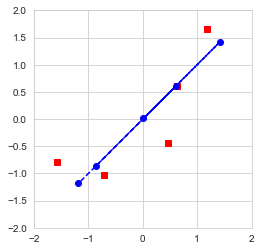

In [179]:
# If we use the compressed matrix to draw the line. This matrix is exactly the projection of 5 observation on the line
sns.set_style('whitegrid')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_scaled, y_scaled, c='r', marker='s')
A_x=[row[0] for row in A]
A_y=[row[1] for row in A]
plt.plot(A_x, A_y, linestyle='--', marker='o', color='b')

In [186]:
# if we rotate A based on vecotr, we would get the distance between the dots in the line and 0.
# Then we could use this matrix as a one-dimentional component, the dimention was reduced
A.dot(V_reduce.T)

array([[-1.22490202],
       [ 2.01196539],
       [ 0.01514255],
       [ 0.87101626],
       [-1.67322218]])

In [205]:
# s would be the square root of sum of projection distances in the vector
np.sqrt(sum(A.dot(V_reduce.T)**2))

array([3.01777414])

In [185]:
# Calculate the distance between each point in the fitting line with 0
import math
for i in A:
    print(math.sqrt( ((i[0]-0)**2)+((i[1]-0)**2) ))

1.224902020063899
2.0119653880453976
0.015142551230337033
0.871016263161619
1.6732221823734545


In [150]:
# Compare with original matrix, the component contains 76.15% variance
scaled

array([[-0.70722819, -1.02504486],
       [ 1.18577858,  1.65957016],
       [ 0.4706027 , -0.4491879 ],
       [ 0.62584263,  0.60596038],
       [-1.57499573, -0.79129778]])

In [145]:
# If we select component=2, the compoent matrix would be the same with original matrix
n_component=2
S_reduce = S[:, :n_component]
V_reduce = V[:n_component, :]

In [149]:
U.dot(S_reduce.dot(V_reduce))

array([[-0.70722819, -1.02504486],
       [ 1.18577858,  1.65957016],
       [ 0.4706027 , -0.4491879 ],
       [ 0.62584263,  0.60596038],
       [-1.57499573, -0.79129778]])

# Run Linear Regression Mode to Get Regression Line

In [190]:
import statsmodels.api as sm
X = sm.add_constant(x_scaled)
model = sm.OLS(y_scaled, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     6.222
Date:                Sun, 21 Mar 2021   Prob (F-statistic):             0.0881
Time:                        13:18:18   Log-Likelihood:                -4.2873
No. Observations:                   5   AIC:                             12.57
Df Residuals:                       3   BIC:                             11.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.359e-16      0.329  -7.16e-16      1.0

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


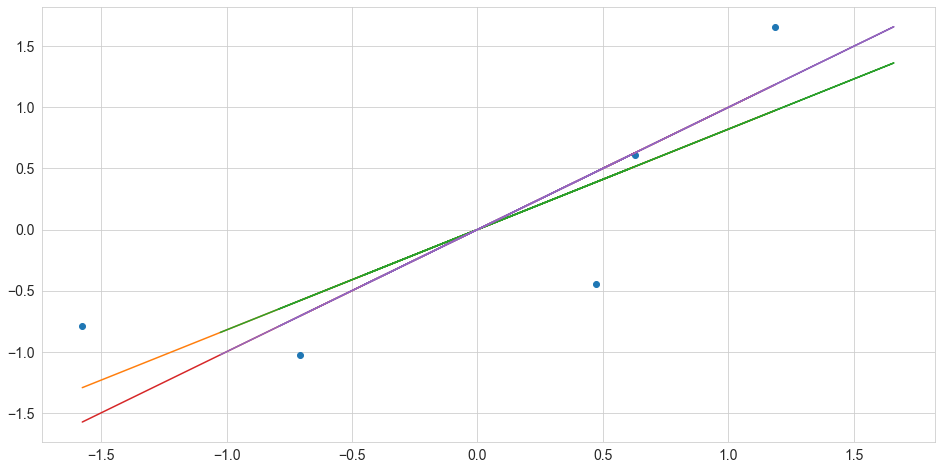

In [197]:
# Draw both regression line and SVD reduction line
plt.plot(x_scaled, y_scaled, 'o')
m=0.8214
b=-2.359e-16
plt.plot(scaled, m*scaled + b)
plt.plot(scaled, 1*scaled + 0)
plt.show()

# Calculate PCA

In [198]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn import preprocessing
pca=PCA(n_components=1)
components=pca.fit_transform(scaled)
componentsDf=pd.DataFrame(data=components, columns=['component'+str(i) for i in range(1,2)])

In [199]:
# The PCA would be aligned with the one-dimentional component we get from SVD
componentsDf

,component1
0,-1.224902
1,2.011965
2,0.015143
3,0.871016
4,-1.673222
